In [1]:
import numpy as np
import matplotlib.pyplot as plt
from min_padding import minimize_max_batch_length

In [2]:
np.random.seed(420)  # Seed for reproducibility
samples = 1000

k = 150
# Parameters for the gamma distribution
shape = 2.0  # Shape parameter (k > 0, the higher the less skewed)
scale = 10.0  # Scale parameter (theta > 0)
L1 = np.random.gamma(shape, scale, samples).astype(int)
L2 = np.random.uniform(0, L1.max(), samples).astype(int)
L_temp = np.concatenate((L1, L2))
L3 = np.random.normal(L_temp.mean(), 20, samples).astype(int)
L4 = np.random.triangular(L_temp.mean(), L_temp.max(), L_temp.max() + 10, samples// 4).astype(int)
L = np.concatenate((L_temp, L3, L4))


# L = np.random.normal(10, 2, samples).astype(int)

# L = np.array([5, 3, 5, 2, 4, 4, 1, 7])
# k = 3

# plt.hist(L, bins=range((int)(L.min()), (int)(L.max() * 1.1), 1), edgecolor='black')

In [3]:

def plot_partitions(L, k, f, method, colors=["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan"]):
    paddings, partitions, *_ = f(L, k, method)

    # make plot larger
    fig, axs = plt.subplots(2, 1, sharex=True)
    fig.set_size_inches(17, 10)

    axs[0].set_title(f"{method} partitioning with padding: {paddings:.2f}")
    bin_width = 1 
    axs[0].hist(L, bins=range((int)(L.min()), (int)(L.max() * 1.1) + bin_width, bin_width), edgecolor="black")
    print(L.max())

    lengths = []
    colors_list = []
    part_mins = []
    part_maxs = []

    for i, p in enumerate(partitions):
        if len(p) == 0:
            continue
        if len(p) == 1:
            axs[0].axvline(p[0], color=colors[i % len(colors)], alpha=0.3)
            axs[0].text(p[0], axs[0].get_ylim()[1]*0.96, f"{len(p)}", ha="center")
            continue
        
        part_min = min(p)
        part_max = max(p)
        # color by rotation and intensity by partition size
        axs[0].axvspan(part_min, part_max, color=colors[i % len(colors)], alpha=min(1, len(p) / len(L) * 1.5))
        # add label to partition size on the top of the graph

        lengths.append(len(p))
        colors_list.append(colors[i % len(colors)])
        part_mins.append(part_min)
        part_maxs.append(part_max)

    for i, size in enumerate(lengths):
        axs[1].bar(part_mins[i], size, width=part_maxs[i] - part_mins[i], bottom=0, color=colors_list[i], alpha=0.7, align="edge")
        axs[1].text(part_mins[i] + (part_maxs[i] - part_mins[i]) / 2, size + 5, f"{size}", ha="center", fontsize="small")
        # area of the bar
        axs[1].text(part_mins[i] + (part_maxs[i] - part_mins[i]) / 2, size / 2, f"{size * (part_maxs[i] - part_mins[i])}", ha="center", fontsize="small")

    # line for mean
    axs[1].axvline(np.mean(L), color="red", linestyle="dashed")
    axs[1].text(np.mean(L), axs[1].get_ylim()[1] + 0.5, f"mean: {np.mean(L):.2f}", ha="center") 
    # line for median
    axs[1].axvline(np.median(L), color="blue", linestyle="dashed")
    axs[1].text(np.median(L), axs[1].get_ylim()[1] + 1, f"median: {np.median(L):.2f}", ha="center")
    # # line for mode
    # axs[1].axvline(np.argmax(np.bincount(L)), color="green", linestyle="dashed")
    # axs[1].text(np.argmax(np.bincount(L)), axs[1].get_ylim()[1] + 1.5, f"mode: {np.argmax(np.bincount(L))}", ha="center")
    

    plt.show()

    # print("Partitions")
    # for p in partitions:
    #     print(p)
    return partitions

In [4]:
# plot_partitions(L, k, minimize_max_batch_length, "BRUTE_FORCE")
# np.percentile(L, np.linspace(100/k, 100, k))

114


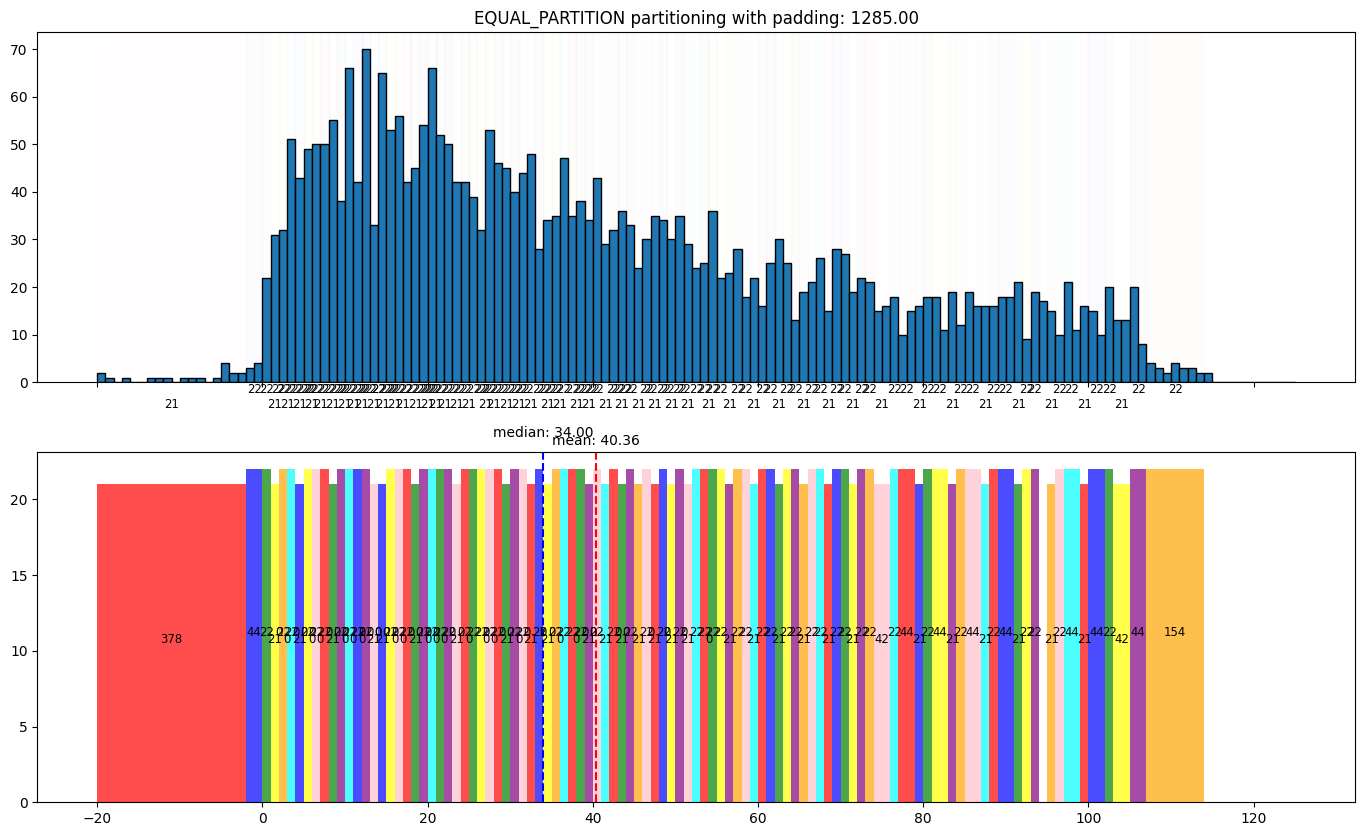

In [5]:
part = plot_partitions(L, k, minimize_max_batch_length, "EQUAL_PARTITION")

c:\Users\richard\dev\leetcode\self\min_padding.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities = distances / distances.sum()


114


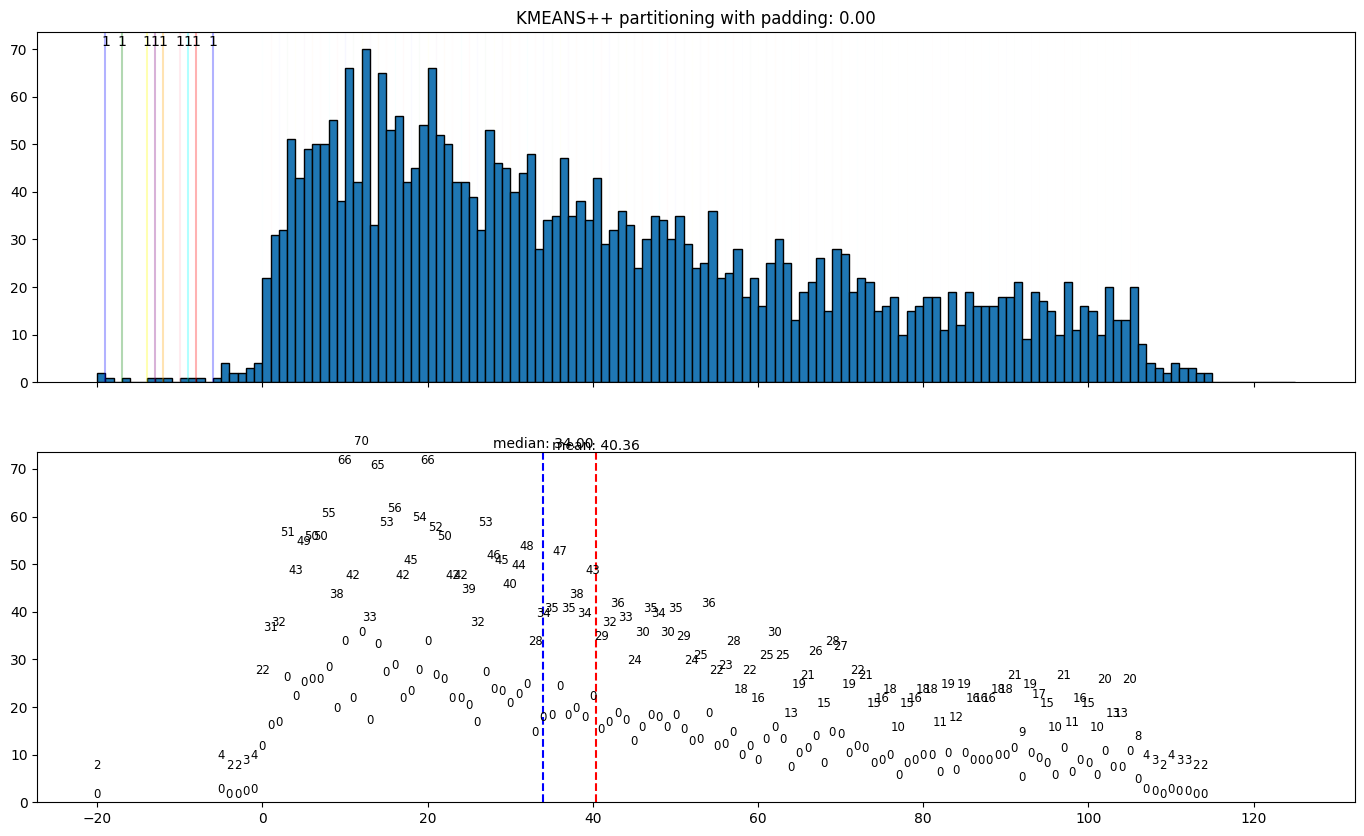

In [6]:
part = plot_partitions(L, k, minimize_max_batch_length, "KMEANS++")

114


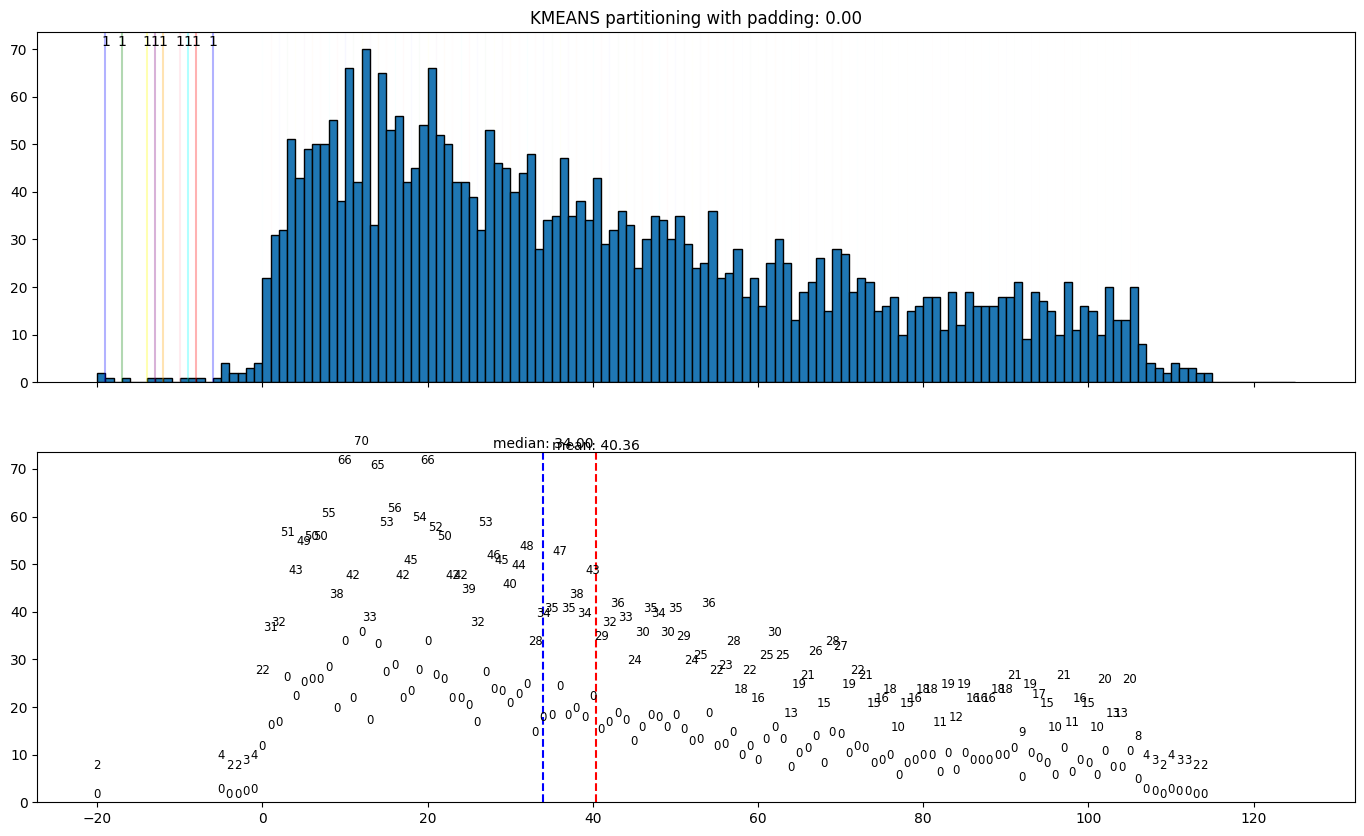

In [7]:
part = plot_partitions(L, k, minimize_max_batch_length, "KMEANS")

In [8]:
partitions = plot_partitions(L, k, minimize_max_batch_length, "DP_OPT")

centroids = np.array([np.mean(p) for p in partitions])

In [ ]:
# plot_partitions(L, k, minimize_max_batch_length, "DP")